# Credit Risk Assessment

**Goal**  


The goal of analyzing the Credit Risk dataset is to develop predictive models that can accurately assess the credit risk associated with loan applicants. By leveraging machine learning algorithms on historical data, the aim is to identify patterns and factors that contribute to loan defaults and non-defaults. This analysis enables financial institutions to make informed decisions when evaluating loan applications, minimizing the risk of default and optimizing lending practices.

Dataset: [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data?select=credit_risk_dataset.csv)

In [12]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")


### Get Data

In [13]:
#Read data
data_original =  pd.read_csv("data/ds_credit.csv") 
data = pd.read_csv("data/ds_credit.csv") 

### Exploratory Data Analysis (EDA)  

This section provides insights into data characteristics, identifies patterns and relationships between variables, detects anomalies, assists in feature selection and engineering, aids in model interpretation, and helps assess model assumptions.

In [14]:
# Top 5 rows
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [19]:
# MAX and MIN age
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# People with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [20]:
# MAX and MIN income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

# People with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [21]:
# MAX and MIN loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# People with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


**Visualization of Home Ownership Distribution**

In [22]:

level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

*Observations: Most of the People taking a loan doesnt own their own house*

**Distribution of Loan Grades**

In [23]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

*Observations: Loan Grade A and B comprises of 65.2% of total*

**Loan Intent Distribution Histogram**

In [24]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

*Observations: Loan Intent are equally almost distributed*

**Distribution of Person Credit History Length**

In [25]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

**Pairplot of Features with Loan Status**

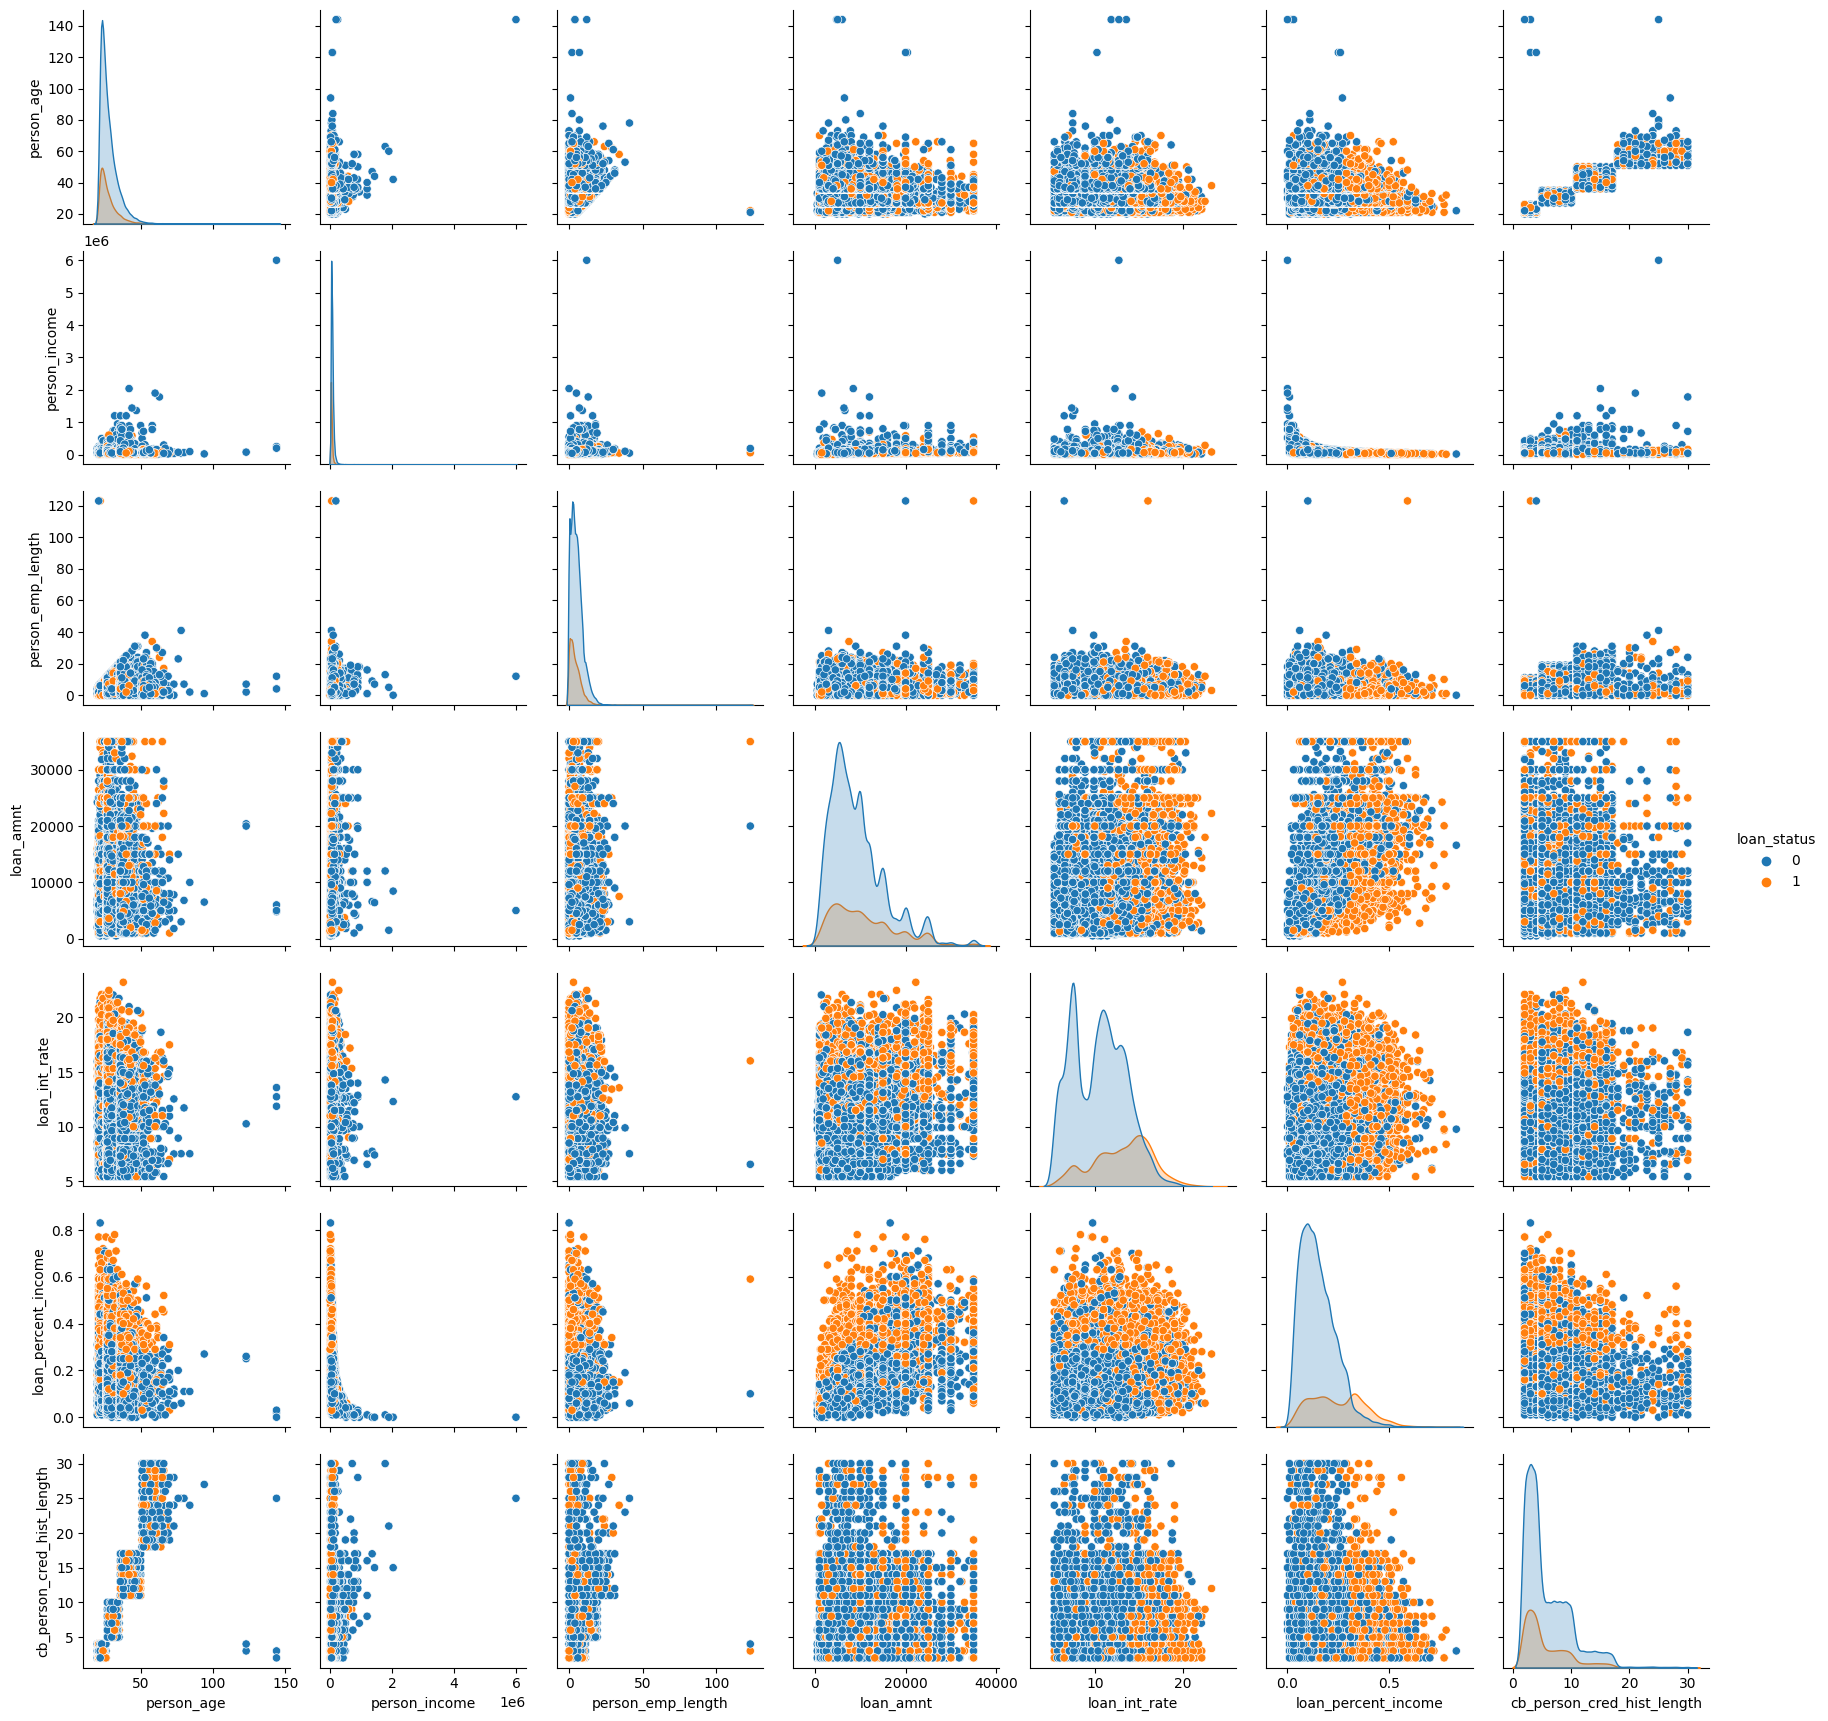

In [26]:
sns.pairplot(data,hue="loan_status")

## Feature Engineering  

 In this section we are creating new features, transforming existing ones, handling missing values, encoding categorical variables, reducing dimensionality, scaling features, and selecting the most relevant features. Through these techniques, feature engineering enables the extraction of valuable insights from raw data, improves model interpretability, and mitigates the impact of noisy or irrelevant features, ultimately leading to more accurate predictions and actionable insights from the data.

**Age Group**

<BarContainer object of 58 artists>

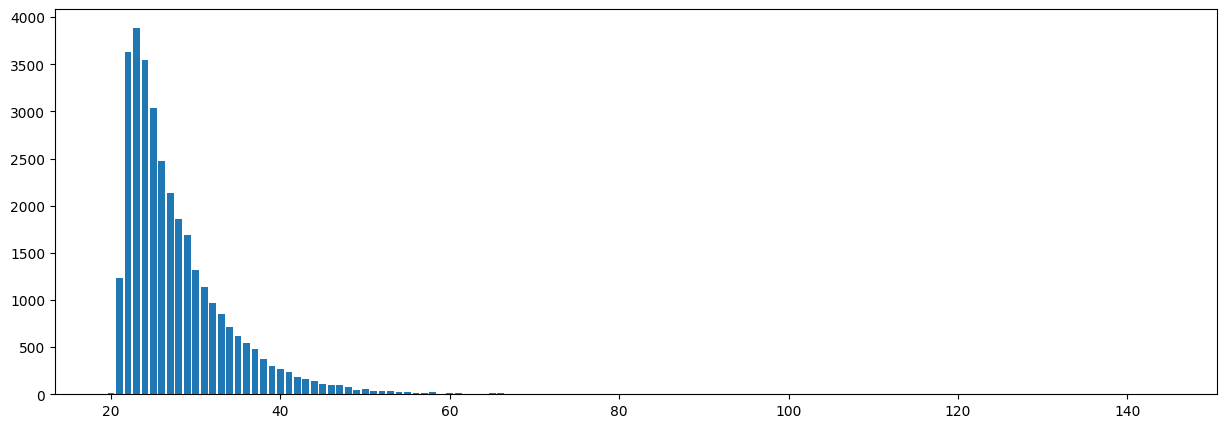

In [27]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [28]:
(data['person_age'].value_counts().values>90).sum()

27

*Observation: There is less loan takers after 80*

In [29]:
# Dropping age above 80
data = data.drop(data[data['person_age'] > 80].index, axis=0)

In [30]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [31]:
data['age_group'] = data['age_group'].astype('object')

In [32]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


**Income Group**

In [33]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [34]:
data['income_group'] = data['income_group'].astype('object')

In [35]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,middle
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle


**Loan Amount**

In [36]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [37]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
32576        medium
32577    very large
32578    very large
32579         large
32580        medium
Name: loan_amount_group, Length: 32574, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [38]:
data['loan_amount_group'] = data['loan_amount_group'].astype('object')

In [39]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [40]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16441
MORTGAGE    13440
OWN          2584
OTHER         107
Name: count, dtype: int64

In [41]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [42]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32572 entries, 1 to 32580
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32572 non-null  int64  
 1   person_income               32572 non-null  int64  
 2   person_home_ownership       32572 non-null  object 
 3   person_emp_length           31677 non-null  float64
 4   loan_intent                 32572 non-null  object 
 5   loan_grade                  32572 non-null  object 
 6   loan_amnt                   32572 non-null  int64  
 7   loan_int_rate               29458 non-null  float64
 8   loan_status                 32572 non-null  int64  
 9   loan_percent_income         32572 non-null  float64
 10  cb_person_default_on_file   32572 non-null  object 
 11  cb_person_cred_hist_length  32572 non-null  int64  
 12  age_group                   32538 non-null  object 
 13  income_group                32572 no

## Data Preprocessing

In [44]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [46]:
x_train.shape,x_test.shape

((26057, 17), (6515, 17))

In [47]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Taking Categorical columns
catcol = data.select_dtypes(include='object').columns

ohe = OneHotEncoder()
ohe.fit(x_train[catcol])

OneHotEncoder()

In [49]:
ohe.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [50]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

merge_ohe_col

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION',
       'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'Y', '20-25', '26-35',
       '36-45', '46-55', '56-65', nan, 'high', 'high-middle', 'low',
       'low-middle', 'middle', 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [51]:
ohe_data = pd.DataFrame(ohe.transform(x_train[catcol]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[catcol]).toarray(),columns=merge_ohe_col)


In [52]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(catcol, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(catcol, axis=1)

In [53]:
X_new.head()
X_new.shape

(26057, 45)

In [54]:
X_new_test.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,22,56920,6.0,10000,14.59,0.18,2,0.175685,0.00060,0.001459
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,31,80000,0.0,10000,8.59,0.13,6,0.125000,0.00000,0.000859
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,46,48956,0.0,2800,10.59,0.06,14,0.057194,0.00000,0.003782
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27,34152,5.0,5000,13.79,0.15,10,0.146404,0.00100,0.002758
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20,85920,3.0,12000,8.49,0.14,2,0.139665,0.00025,0.000708


In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])



NameError: name 'X_new' is not defined

In [87]:
X_new_test.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


## ML Classification Models

In [101]:
# Import Packages
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [110]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
lrc = LogisticRegression()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 

In [111]:
clf = {
    'KN' : knc,
    'LR': lrc,
    'xgb':xgb,
    'cat':cat,
}

In [103]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

In [104]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [112]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  KN
Accuracy -  0.7922123275711542
Precision -  0.5465517241379311
Recall -  0.25482315112540194
Specificity -  0.9413339281730984

For  LR
Accuracy -  0.8400558756766195
Precision -  0.6855203619909502
Recall -  0.4871382636655949
Specificity -  0.937987954494758

For  xgb
Accuracy -  0.9427274314649904
Precision -  0.9731404958677686
Recall -  0.7572347266881029
Specificity -  0.9942003122908767

For  cat
Accuracy -  0.9439497118910424
Precision -  0.9842602308499475
Recall -  0.7540192926045016
Specificity -  0.9966540263216596



### Training Final Model

In [114]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
xgb = XGBClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('xgb', xgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

For ensemble
Accuracy -  0.9380129212502183
Precision -  0.9933407325194229
Recall -  0.7194533762057878
Specificity -  0.9986616105286639


Based on the performance metrics of the ensemble classifier:


* Accuracy: The model correctly classifies approximately 93.8% of the instances in the test data.
* Precision: About 99.3% of the instances predicted as positive by the model are actually positive.
* Recall: The model captures around 71.9% of all positive instances in the test data.
* Specificity: Approximately 99.9% of the instances predicted as negative by the model are actually negative.  

Overall, this ensemble classifier seems to perform well in terms of accuracy and precision. However, the recall is relatively lower, indicating that it may miss some positive instances. Depending on the specific application and the importance of recall, further adjustments or fine-tuning of the model might be necessary.